## Tugas 04 Data Mining

Nama: Muh. Yusuf Syam<br>
NIM: H071191044

<h1 align="center"> Dimensionality Reduction </h1><br>

### Penjelasan Dataset

Dataset yang saya gunakan adalah dataset kebangkrutan perusahaan-perusahaan yang ada di Taiwan. Dataset dikumpulkan dari Jurnal Ekonomi Taiwan tahun 1999 sampai 2009. Kebangkrutan perusahaan didefinisikan berdasarkan peraturan bisnis dari Bursa Efek Taiwan.<br><br>Adapun kelas dari dataset ini adalah pada kolom 'Bankrupt?', yang berjumlah 2 yaitu telah bangkrut(1), dan belum(0)

### Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

Mengimport Dataset

In [2]:
df= pd.read_csv('dataset_company_bankruptcy_prediction.csv')
df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

Mengecek jika terdapat nilai null pada dataset

In [3]:
pd.options.display.min_rows= len(df.columns)

print(df.isnull().sum())

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
 Operating Profit Rate                                      0
 Pre-tax net Interest Rate                                  0
 After-tax net Interest Rate                                0
 Non-industry income and expenditure/revenue                0
 Continuous interest rate (after tax)                       0
 Operating Expense Rate                                     0
 Research and development expense rate                      0
 Cash flow rate                                             0
 Interest-bearing debt interest rate                        0
 Tax rate (A)                                               0
 Net Val

Mengganti nama kolom kelas

In [4]:
df= df.rename(columns={'Bankrupt?':'Bankruptcy'})

Mengubah variabel number yang bukan float menjadi float

In [5]:
for i in df.columns:
    if(df[i].dtypes!='float'):
        df[i]= df[i].apply(float)

Mendeskripsikan dataset dengan memanggil fungsi describe()

In [6]:
df.describe()

Bankruptcy   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
mi

Visualisasi data dengan plot scatter

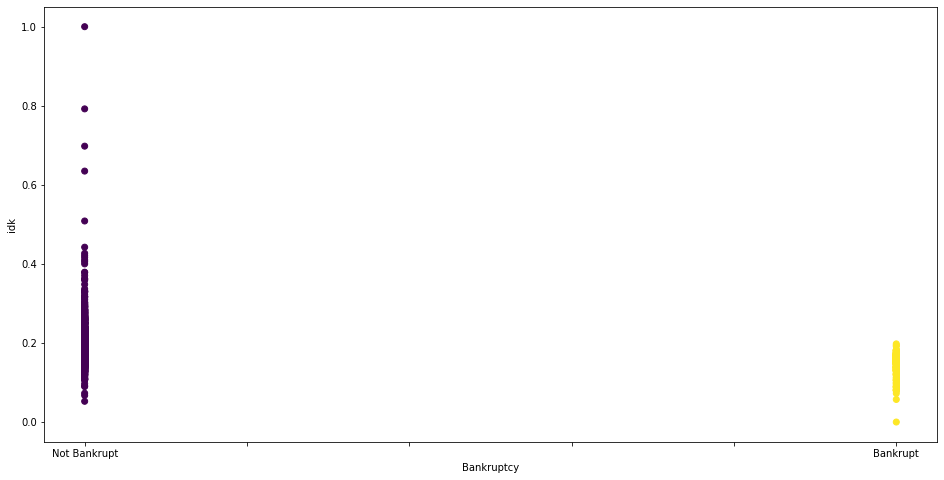

In [7]:
fig, ax = plt.subplots(figsize=(16,8))

ax.scatter(df.iloc[:,0], df.loc[:,' Net profit before tax/Paid-in capital'], c=df.iloc[:,0])

ax.set_xlabel('Bankruptcy')
ax.set_ylabel('idk')
plt.setp(ax, xticks= np.linspace(0,1,6), xticklabels= ['Not Bankrupt', '', '', '', '', 'Bankrupt'])

plt.show()

Visualisasi kolom satu per satu dengan box plot

c:\users\lenovo\pycharmprojects\data science\venv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\lenovo\pycharmprojects\data science\venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


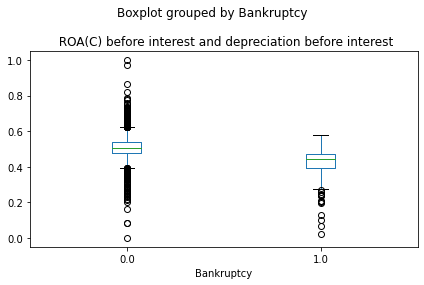

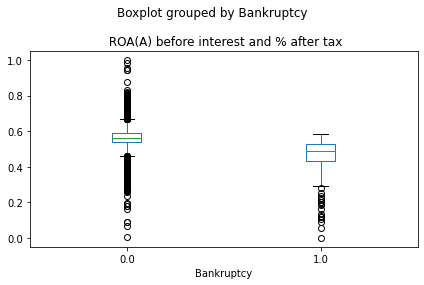

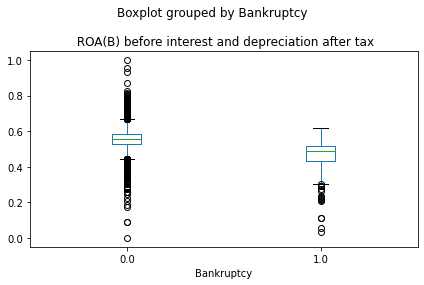

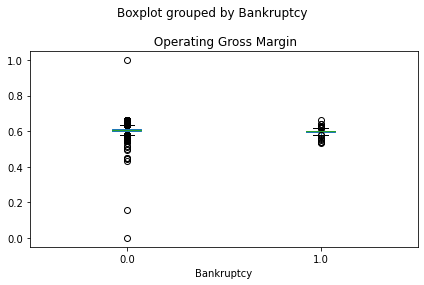

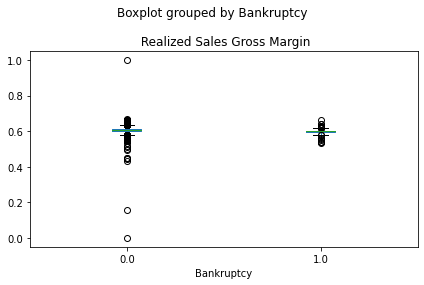

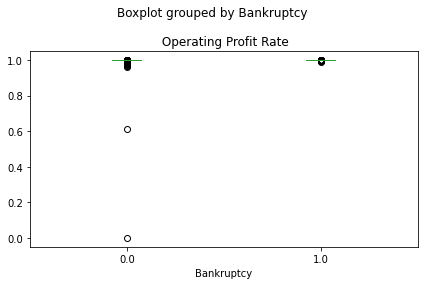

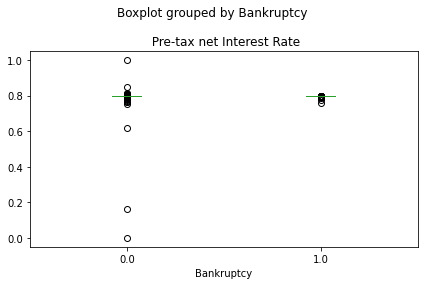

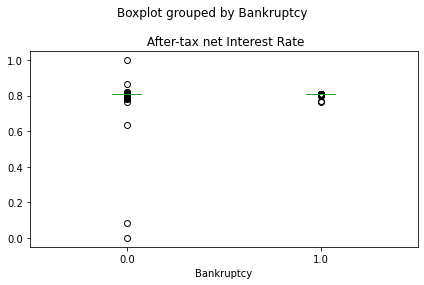

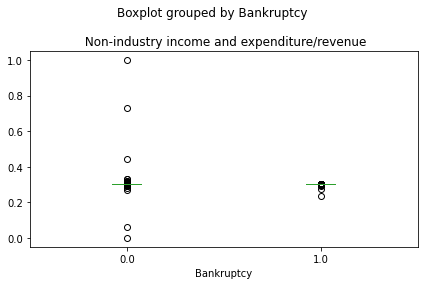

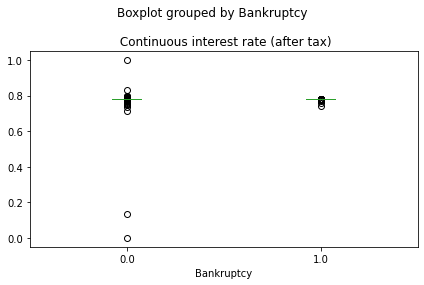

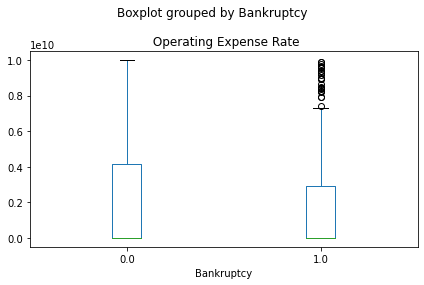

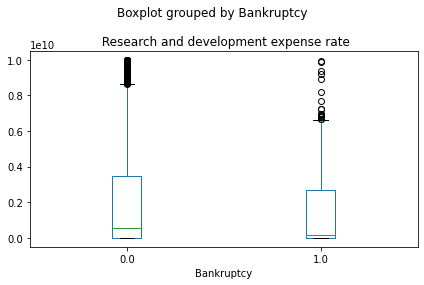

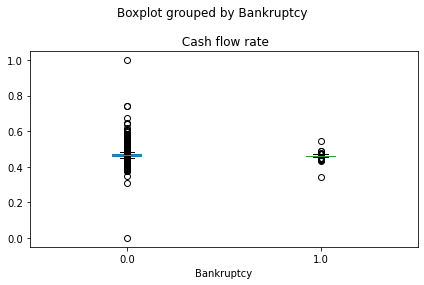

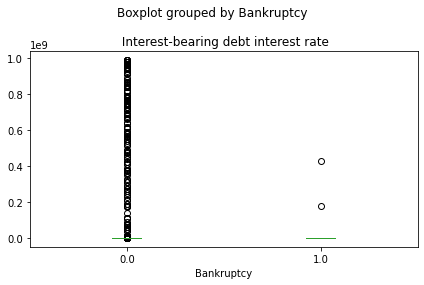

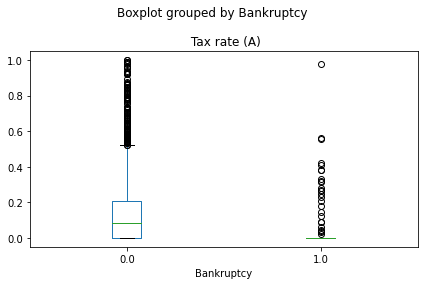

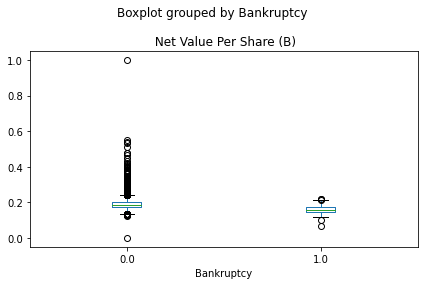

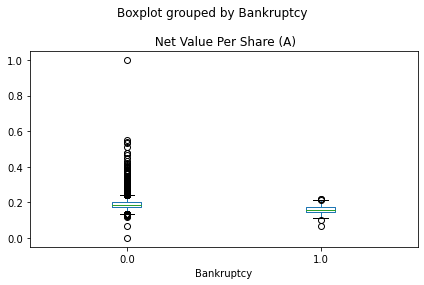

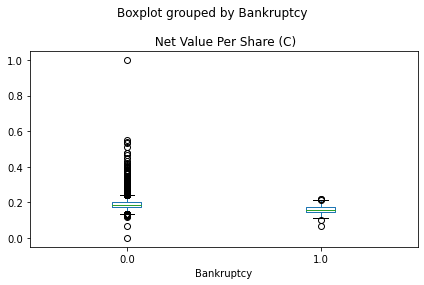

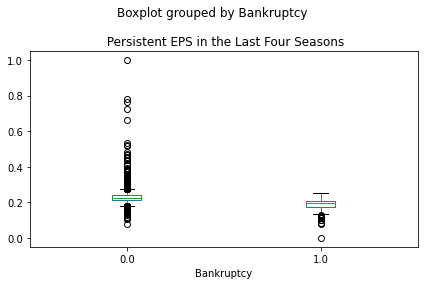

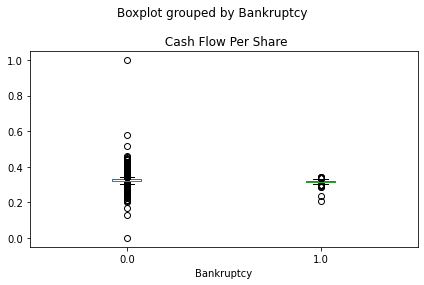

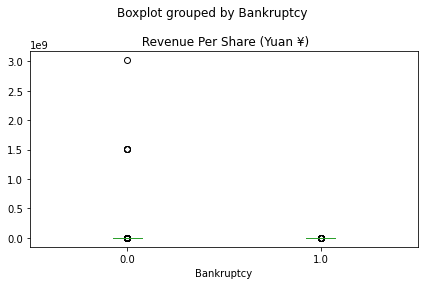

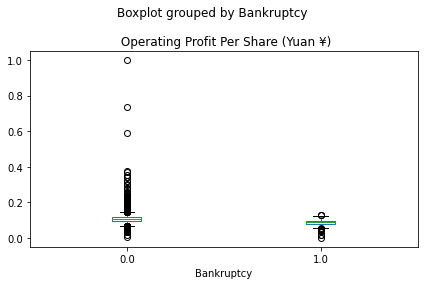

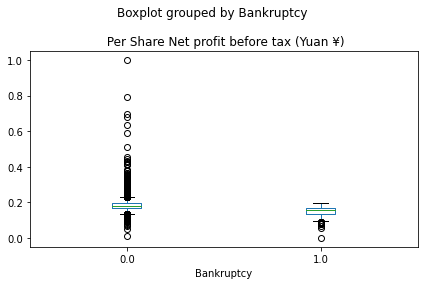

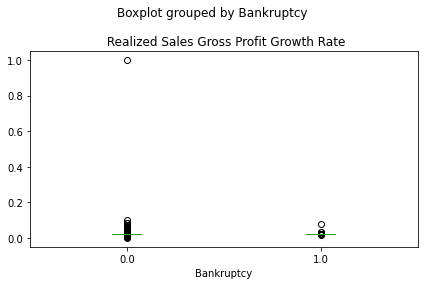

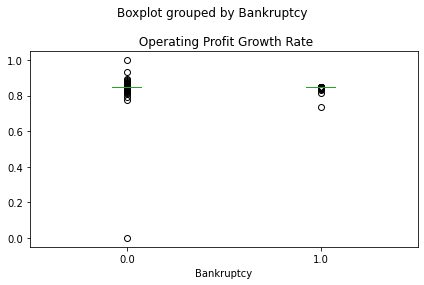

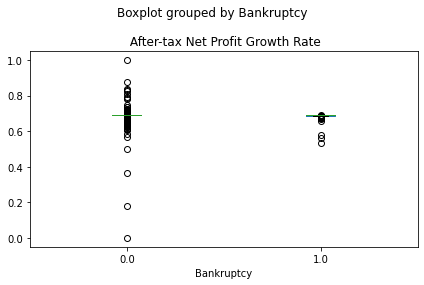

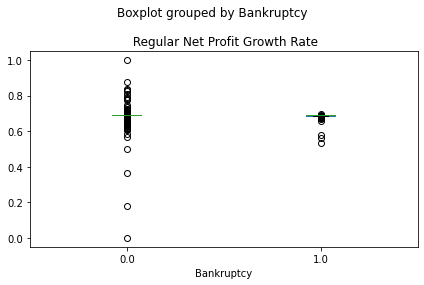

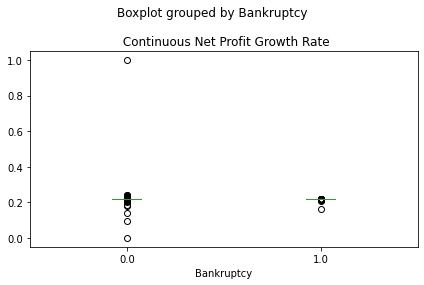

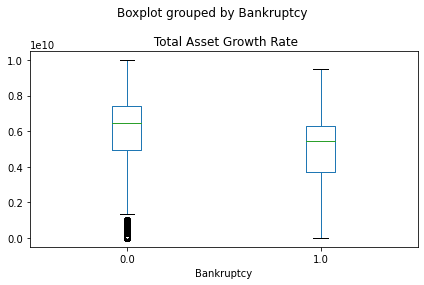

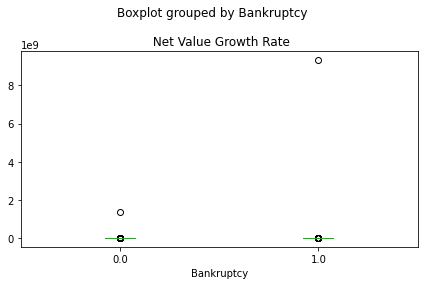

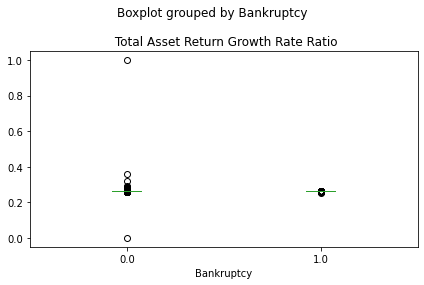

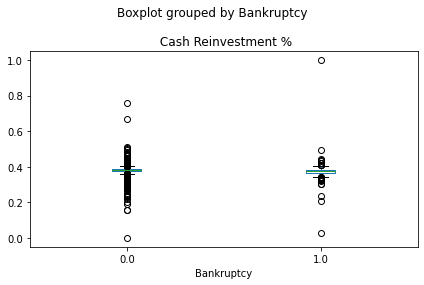

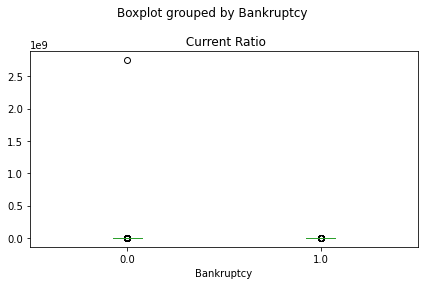

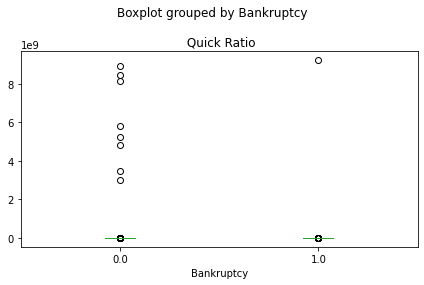

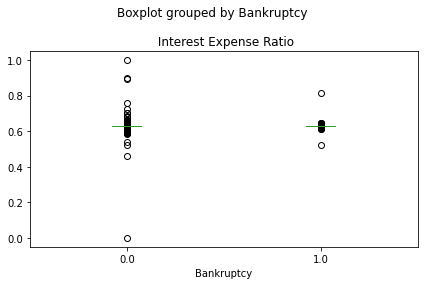

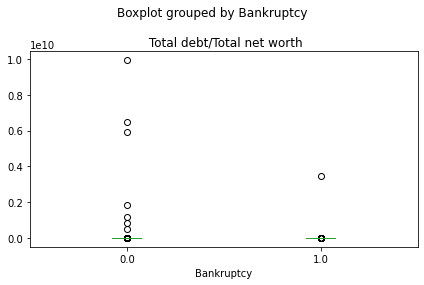

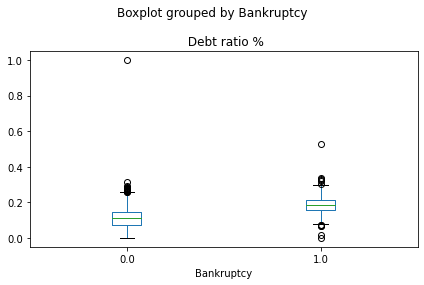

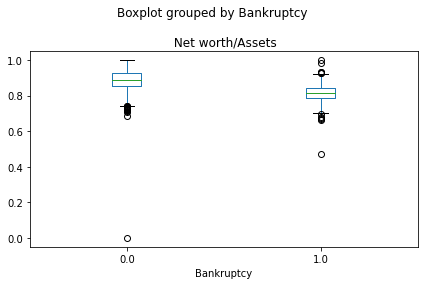

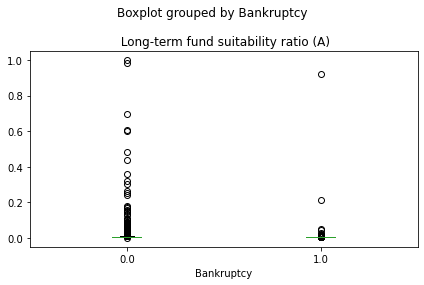

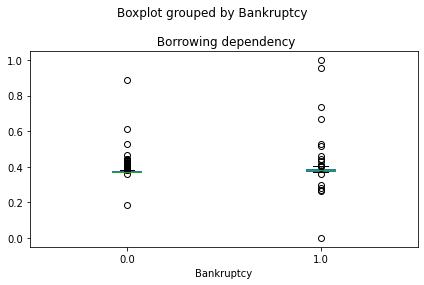

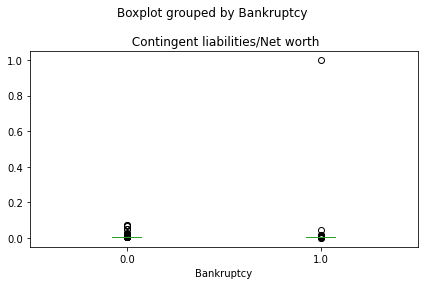

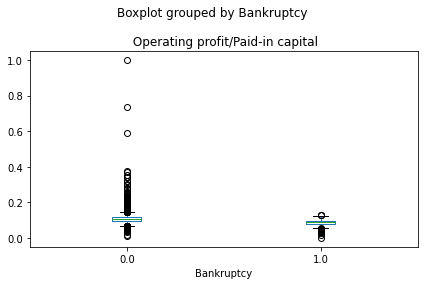

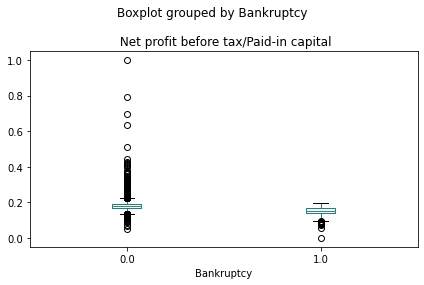

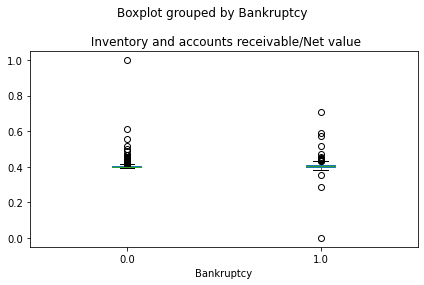

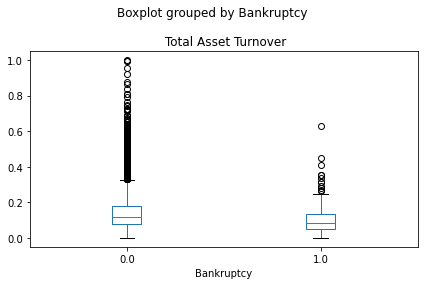

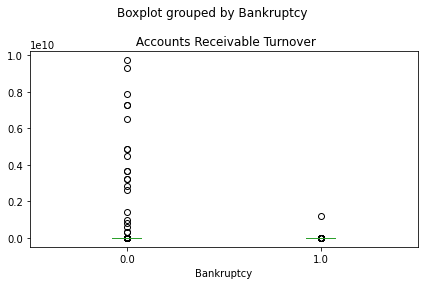

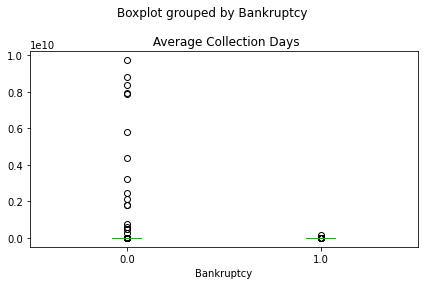

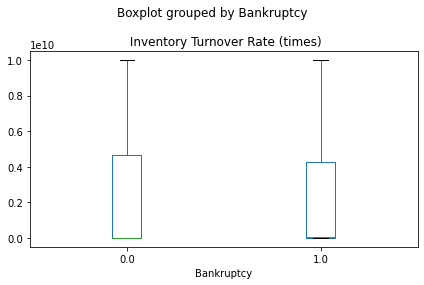

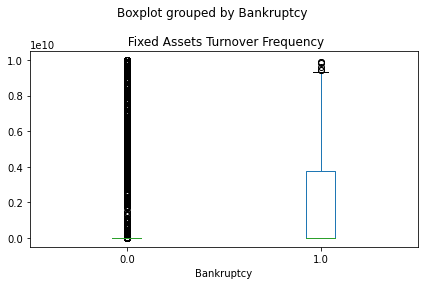

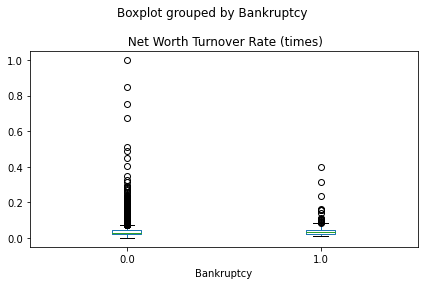

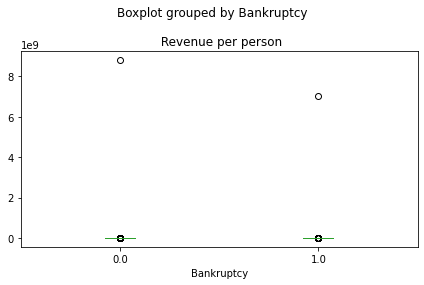

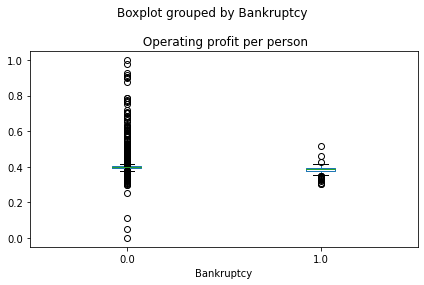

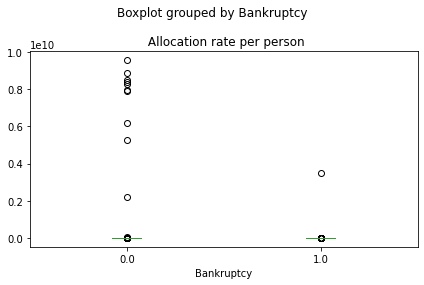

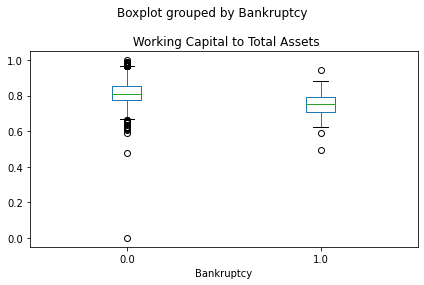

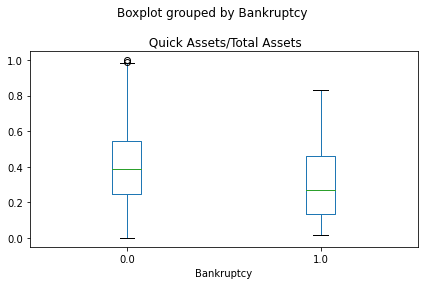

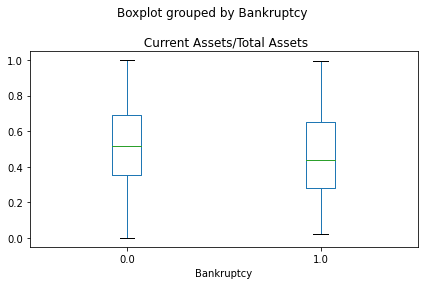

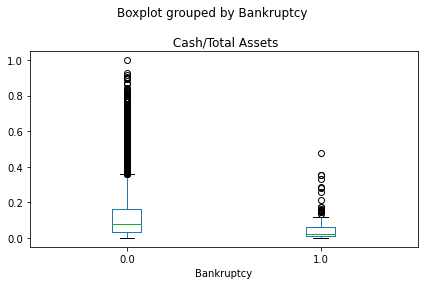

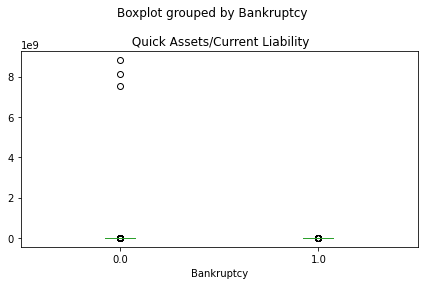

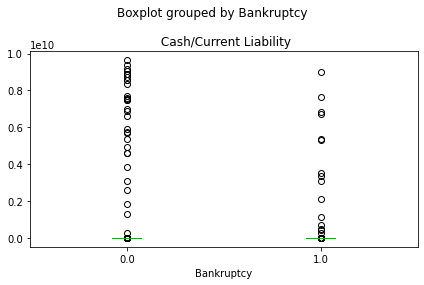

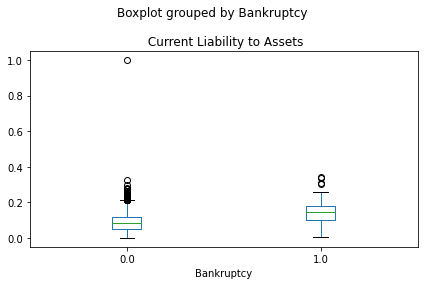

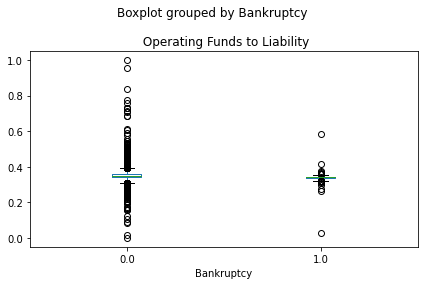

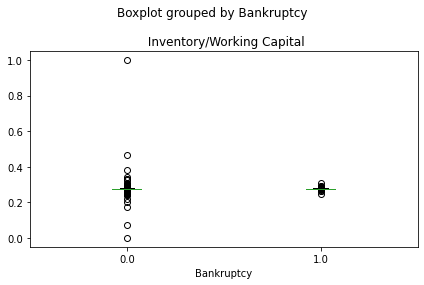

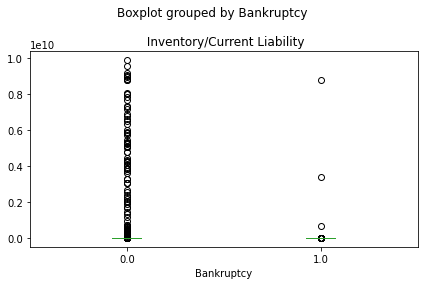

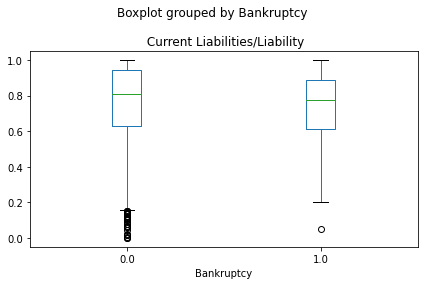

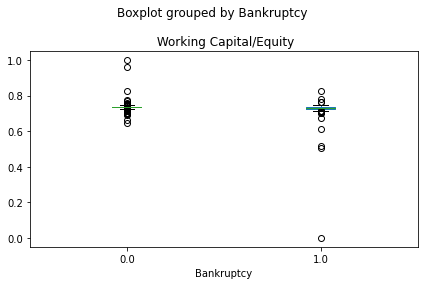

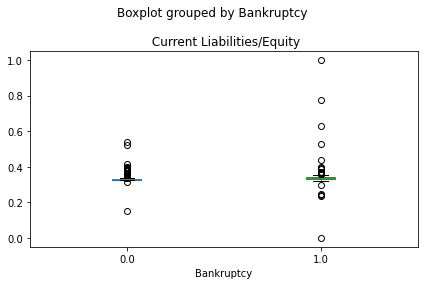

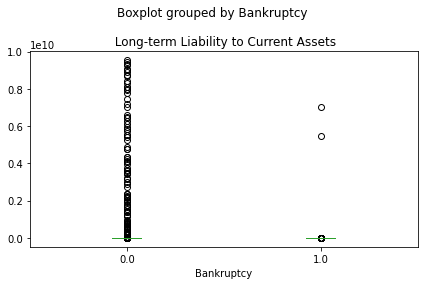

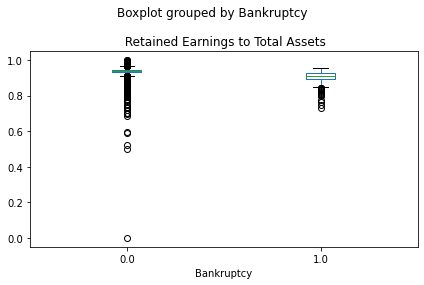

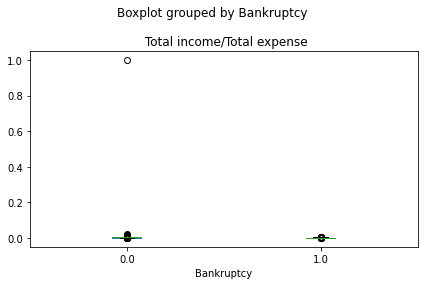

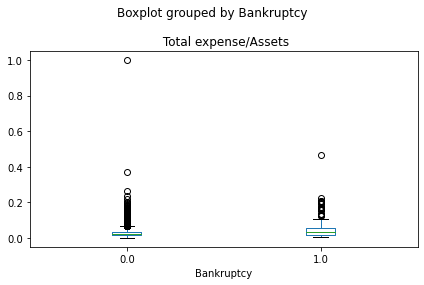

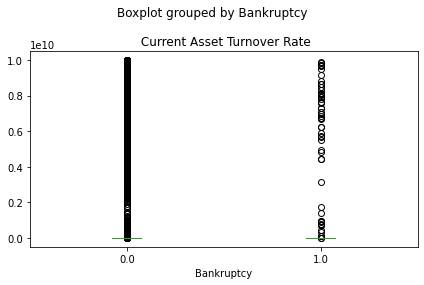

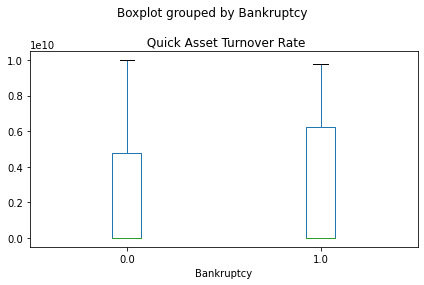

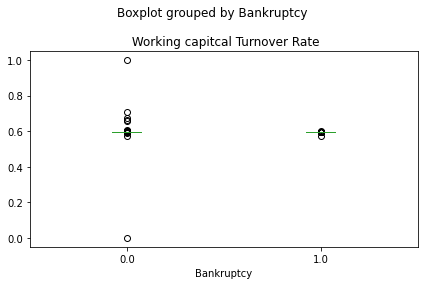

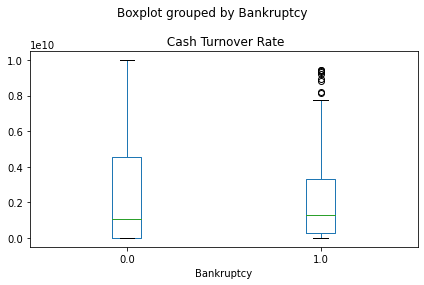

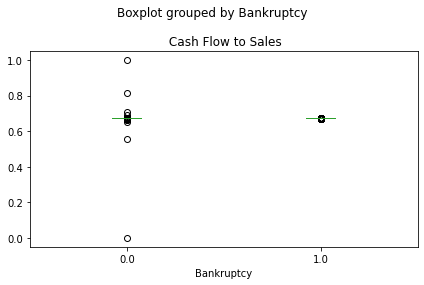

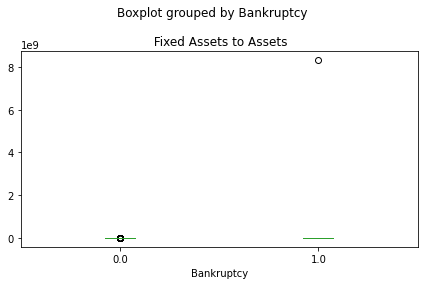

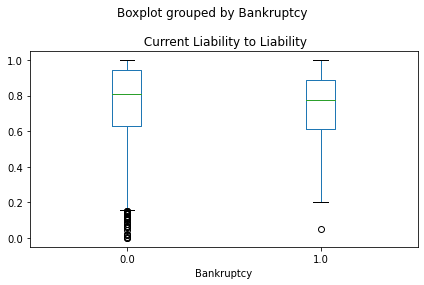

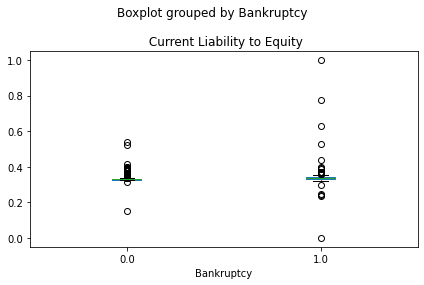

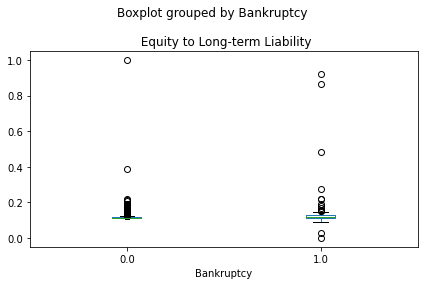

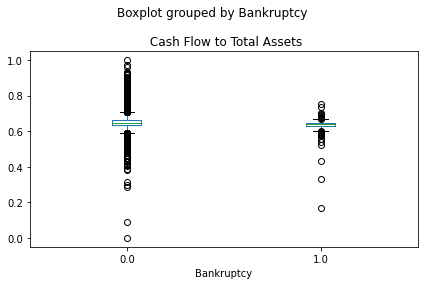

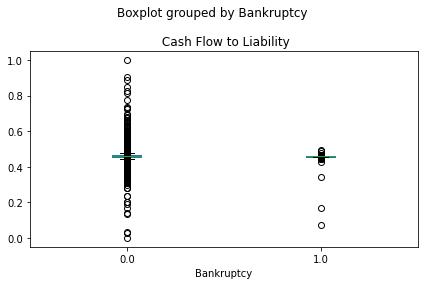

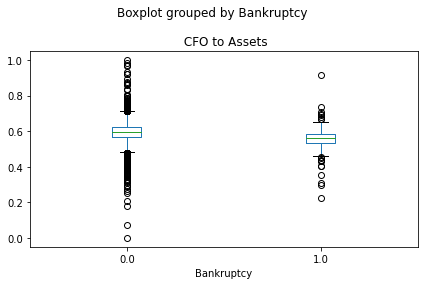

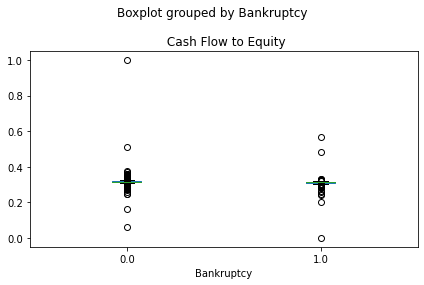

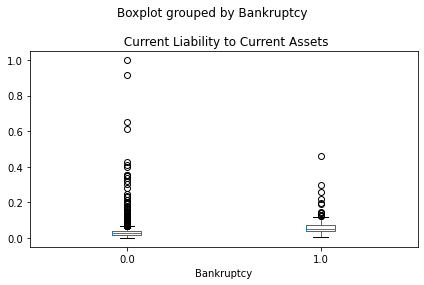

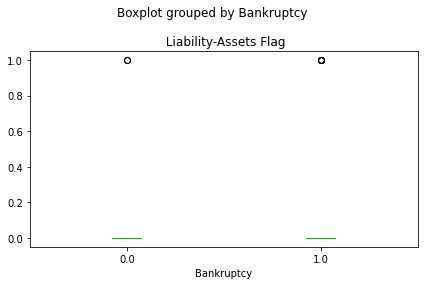

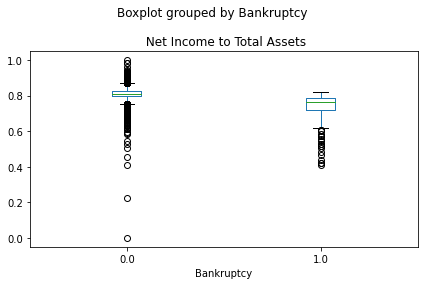

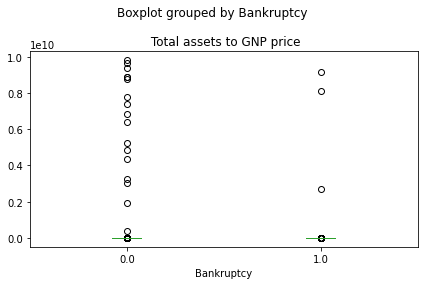

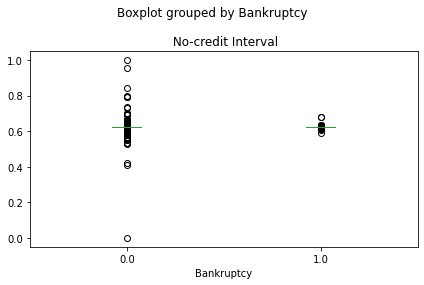

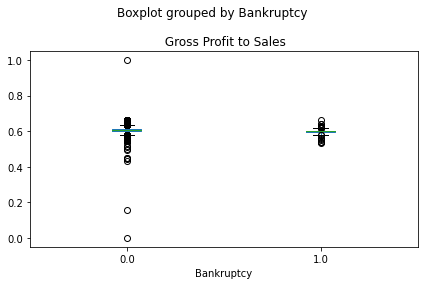

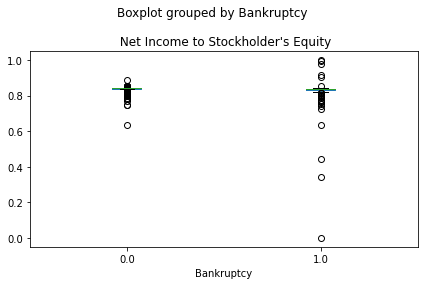

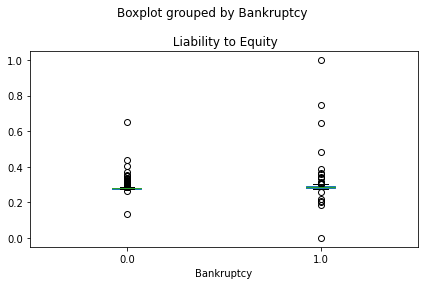

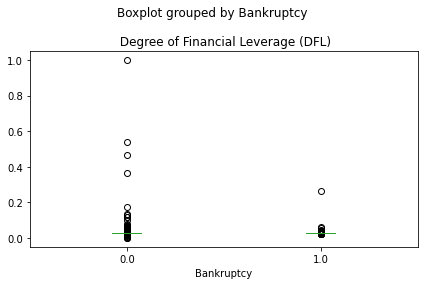

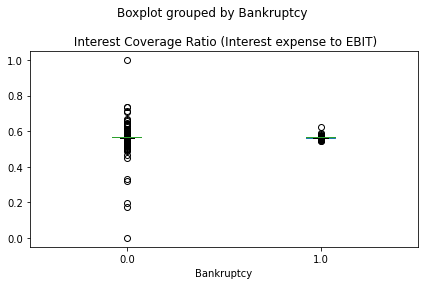

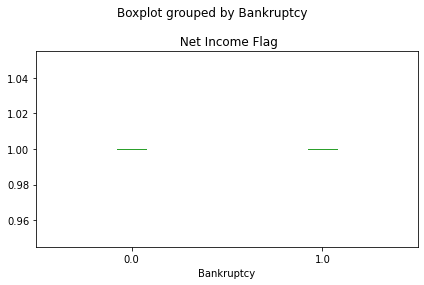

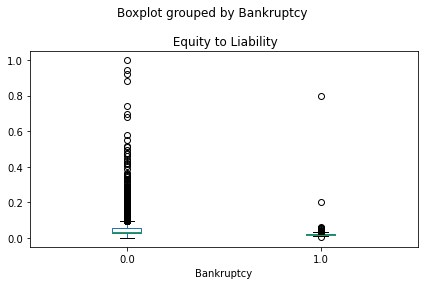

In [8]:
%matplotlib inline 

x= df.drop("Bankruptcy",1)
column_name = list(x.columns)

for i in column_name:
    df.boxplot(by ='Bankruptcy', column =[i], grid = False) 
    plt.tight_layout()

Membuat variabel baru df_out

In [9]:
df_out= df.copy()

### Feature Importance

1. Univariate Selection

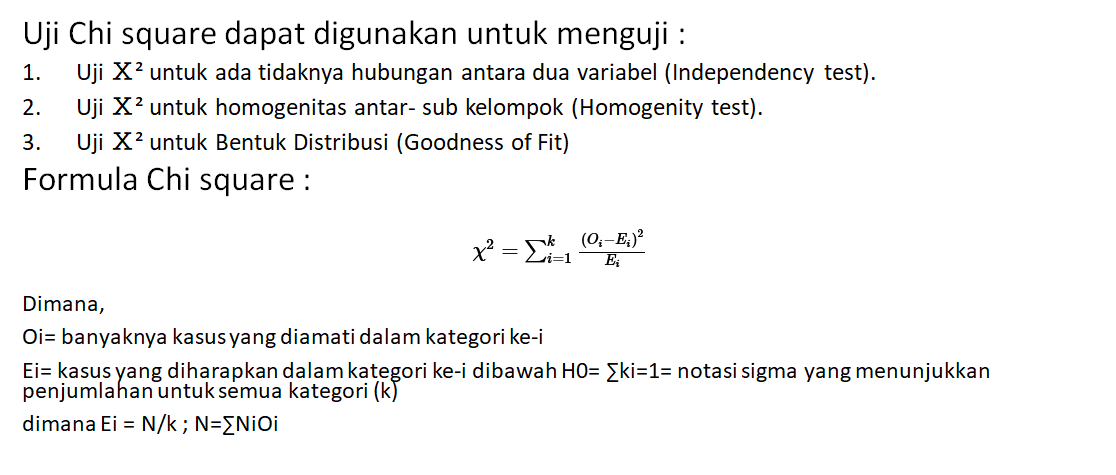

In [10]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df_out.drop('Bankruptcy',1)
y = df_out.loc[:, 'Bankruptcy']

bestfeatures = SelectKBest(score_func=chi2, k=len(df_out.columns)-1)

fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
p_values = pd.DataFrame(fit.pvalues_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores, p_values],axis=1)
featureScores.columns = ['Feature Name','chi-square Score', 'p-values']  #naming the dataframe columns
pd.options.display.min_rows= len(df.columns)
print(featureScores.nlargest(96,'chi-square Score'))  #print 10 best features

                                         Feature Name  chi-square Score  \
58                             Cash/Current Liability      2.901545e+11   
75                             Fixed Assets to Assets      2.495621e+11   
29                              Net Value Growth Rate      2.421293e+11   
48                    Fixed Assets Turnover Frequency      2.200229e+11   
50                                 Revenue per person      8.633138e+10   
86                          Total assets to GNP price      6.391313e+10   
33                                        Quick Ratio      3.059892e+10   
71                          Quick Asset Turnover Rate      2.391564e+10   
28                            Total Asset Growth Rate      2.051825e+10   
11              Research and development expense rate      1.385736e+10   
73                                 Cash Turnover Rate      7.747258e+09   
35                         Total debt/Total net worth      6.638710e+09   
70                       

c:\users\lenovo\pycharmprojects\data science\venv\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


2. SVM-RFE

In [11]:
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    print(names)
    return dict(zip(names, ranks))

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import fbeta_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE
from operator import itemgetter

X = df_out.iloc[:, 1:11] # Saya hanya manyisakan 20 fitur karena masalah performa khusus untuk Feature importance ini
y = df_out.loc[:, 'Bankruptcy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

colnames = X.columns
n_features_to_select = 1
svclassifier = SVC(kernel='linear')
rfe = RFE(svclassifier, n_features_to_select, verbose = 1)
rfe.fit(X, y)

y_pred = rfe.predict(X)

ranks[f"RFE score"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

c:\users\lenovo\pycharmprojects\data science\venv\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)'],
      dtype='object')


Hasil feature importance tadi kita susun menjadi visualisasikan lewat dataframe

In [13]:
df_rank = pd.DataFrame(list(ranks[f"RFE score"].items()), columns= ['Feature','Scores'])

df_rank = df_rank.sort_values('Scores', ascending=False)
df_rank

Feature  Scores
7                        After-tax net Interest Rate    1.00
9               Continuous interest rate (after tax)    0.89
8        Non-industry income and expenditure/revenue    0.78
5                              Operating Profit Rate    0.67
6                          Pre-tax net Interest Rate    0.56
3                             Operating Gross Margin    0.44
0   ROA(C) before interest and depreciation befor...    0.33
4                        Realized Sales Gross Margin    0.22
1             ROA(A) before interest and % after tax    0.11
2   ROA(B) before interest and depreciation after...    0.00

Visualisasi dengan plor bar horizontal

c:\users\lenovo\pycharmprojects\data science\venv\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\lenovo\pycharmprojects\data science\venv\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Feature Importances')

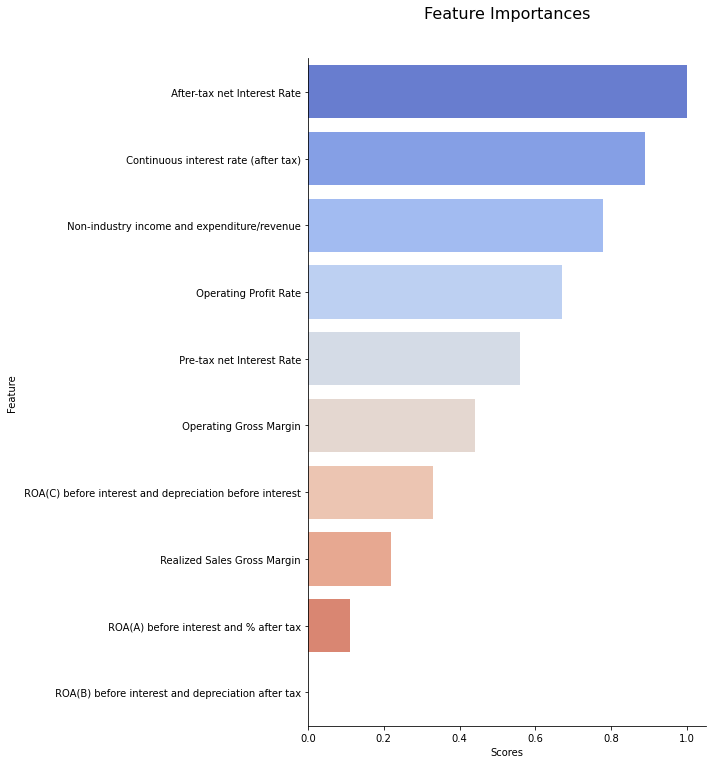

In [14]:
import seaborn as sns
# Let's plot the ranking of the features
sns.factorplot(x="Scores", y="Feature", data = df_rank, kind="bar", 
               size=10, aspect=1, palette='coolwarm')
plt.title('Feature Importances', size= 16, pad= 40)

3. Extratrees

Membuat modelnya lalu memprint nilai feature importance masing-masing atribut

In [15]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

X = df_out.drop('Bankruptcy',1)
y = df_out.loc[:, 'Bankruptcy']

model = ExtraTreesClassifier()
model.fit(X, y)

print(model.feature_importances_)

c:\users\lenovo\pycharmprojects\data science\venv\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


[0.01879426 0.01819067 0.01787655 0.0077935  0.00768914 0.00822906
 0.00855774 0.01067972 0.01158985 0.01045129 0.00712947 0.01021798
 0.00735319 0.01296348 0.00616011 0.01188534 0.01170806 0.01060694
 0.01621806 0.00700784 0.00743263 0.01020992 0.01562667 0.00866851
 0.00769397 0.00637509 0.00625112 0.0086639  0.0094827  0.00886841
 0.01032061 0.00770943 0.00892452 0.00994186 0.01265083 0.00965673
 0.02131195 0.02082805 0.0081623  0.02156789 0.00860798 0.0085123
 0.01676321 0.00763024 0.00661016 0.00676281 0.01036721 0.00841893
 0.01264276 0.00735805 0.01024413 0.00968834 0.01212968 0.01264182
 0.00946306 0.00972742 0.01001923 0.00889142 0.01222094 0.01208722
 0.00756014 0.00989075 0.00783374 0.00836657 0.01147842 0.0127974
 0.0075833  0.01278438 0.00924176 0.00888515 0.00832869 0.00874425
 0.0076258  0.0078764  0.00675243 0.01021556 0.00938183 0.01126385
 0.01119122 0.00733409 0.00730317 0.00798391 0.00770871 0.01296942
 0.00433939 0.027008   0.01174603 0.01043492 0.00826281 0.022447

Memvisualisasikan lewat plot bara horizontal

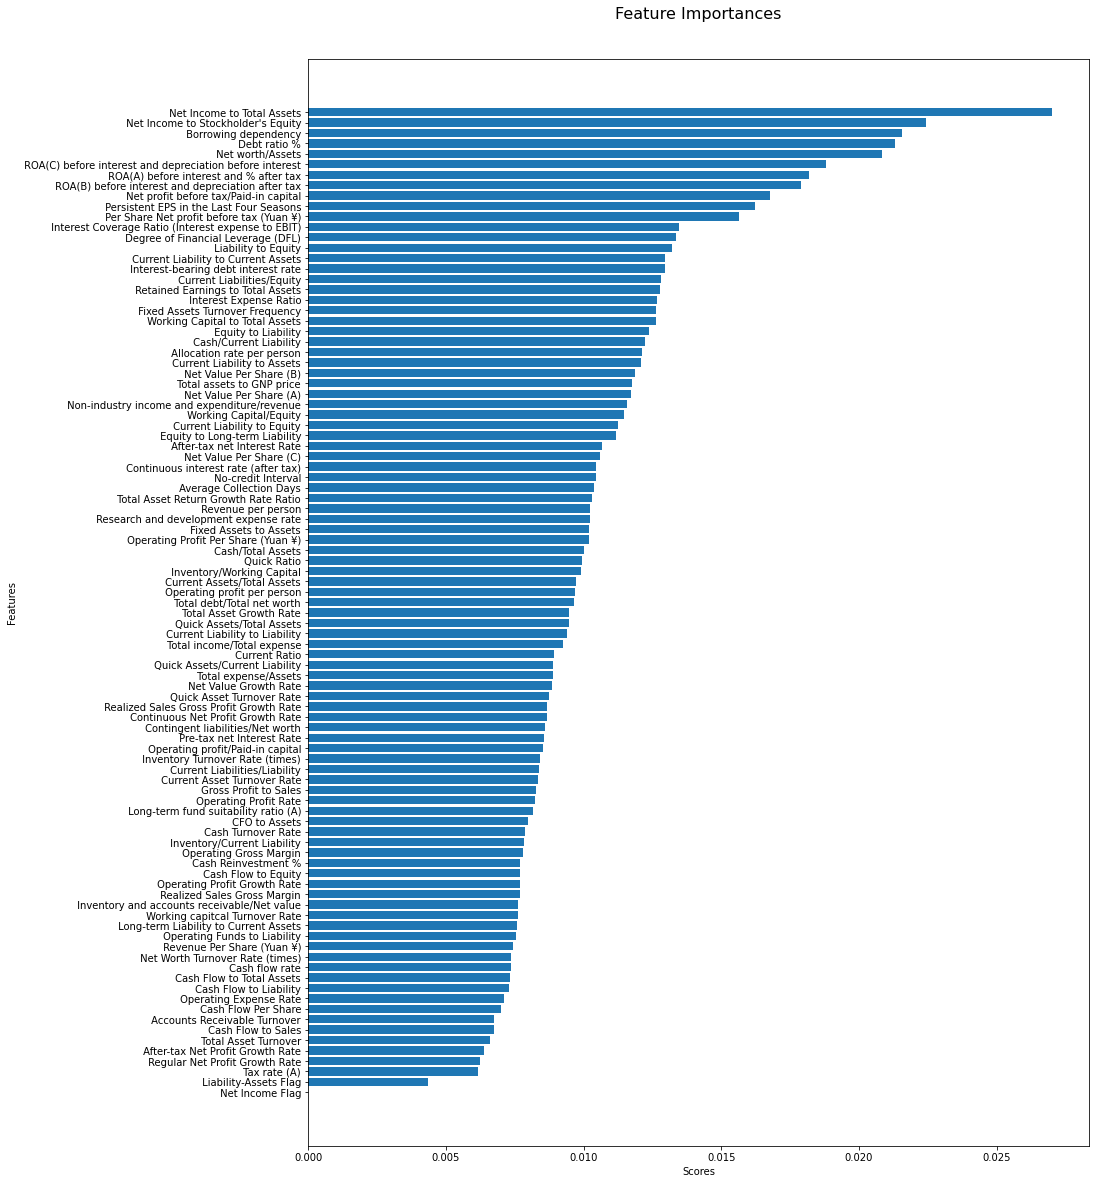

In [16]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns).nlargest(n= 96).iloc[::-1]

plt.figure(figsize=(14,20))

plt.barh(feat_importances.index, feat_importances.iloc[:])

plt.xlabel('Scores')
plt.ylabel('Features')
plt.title('Feature Importances', size= 16, pad= 40)

plt.show()

4. Correlation Matrix with Heatmap

c:\users\lenovo\pycharmprojects\data science\venv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


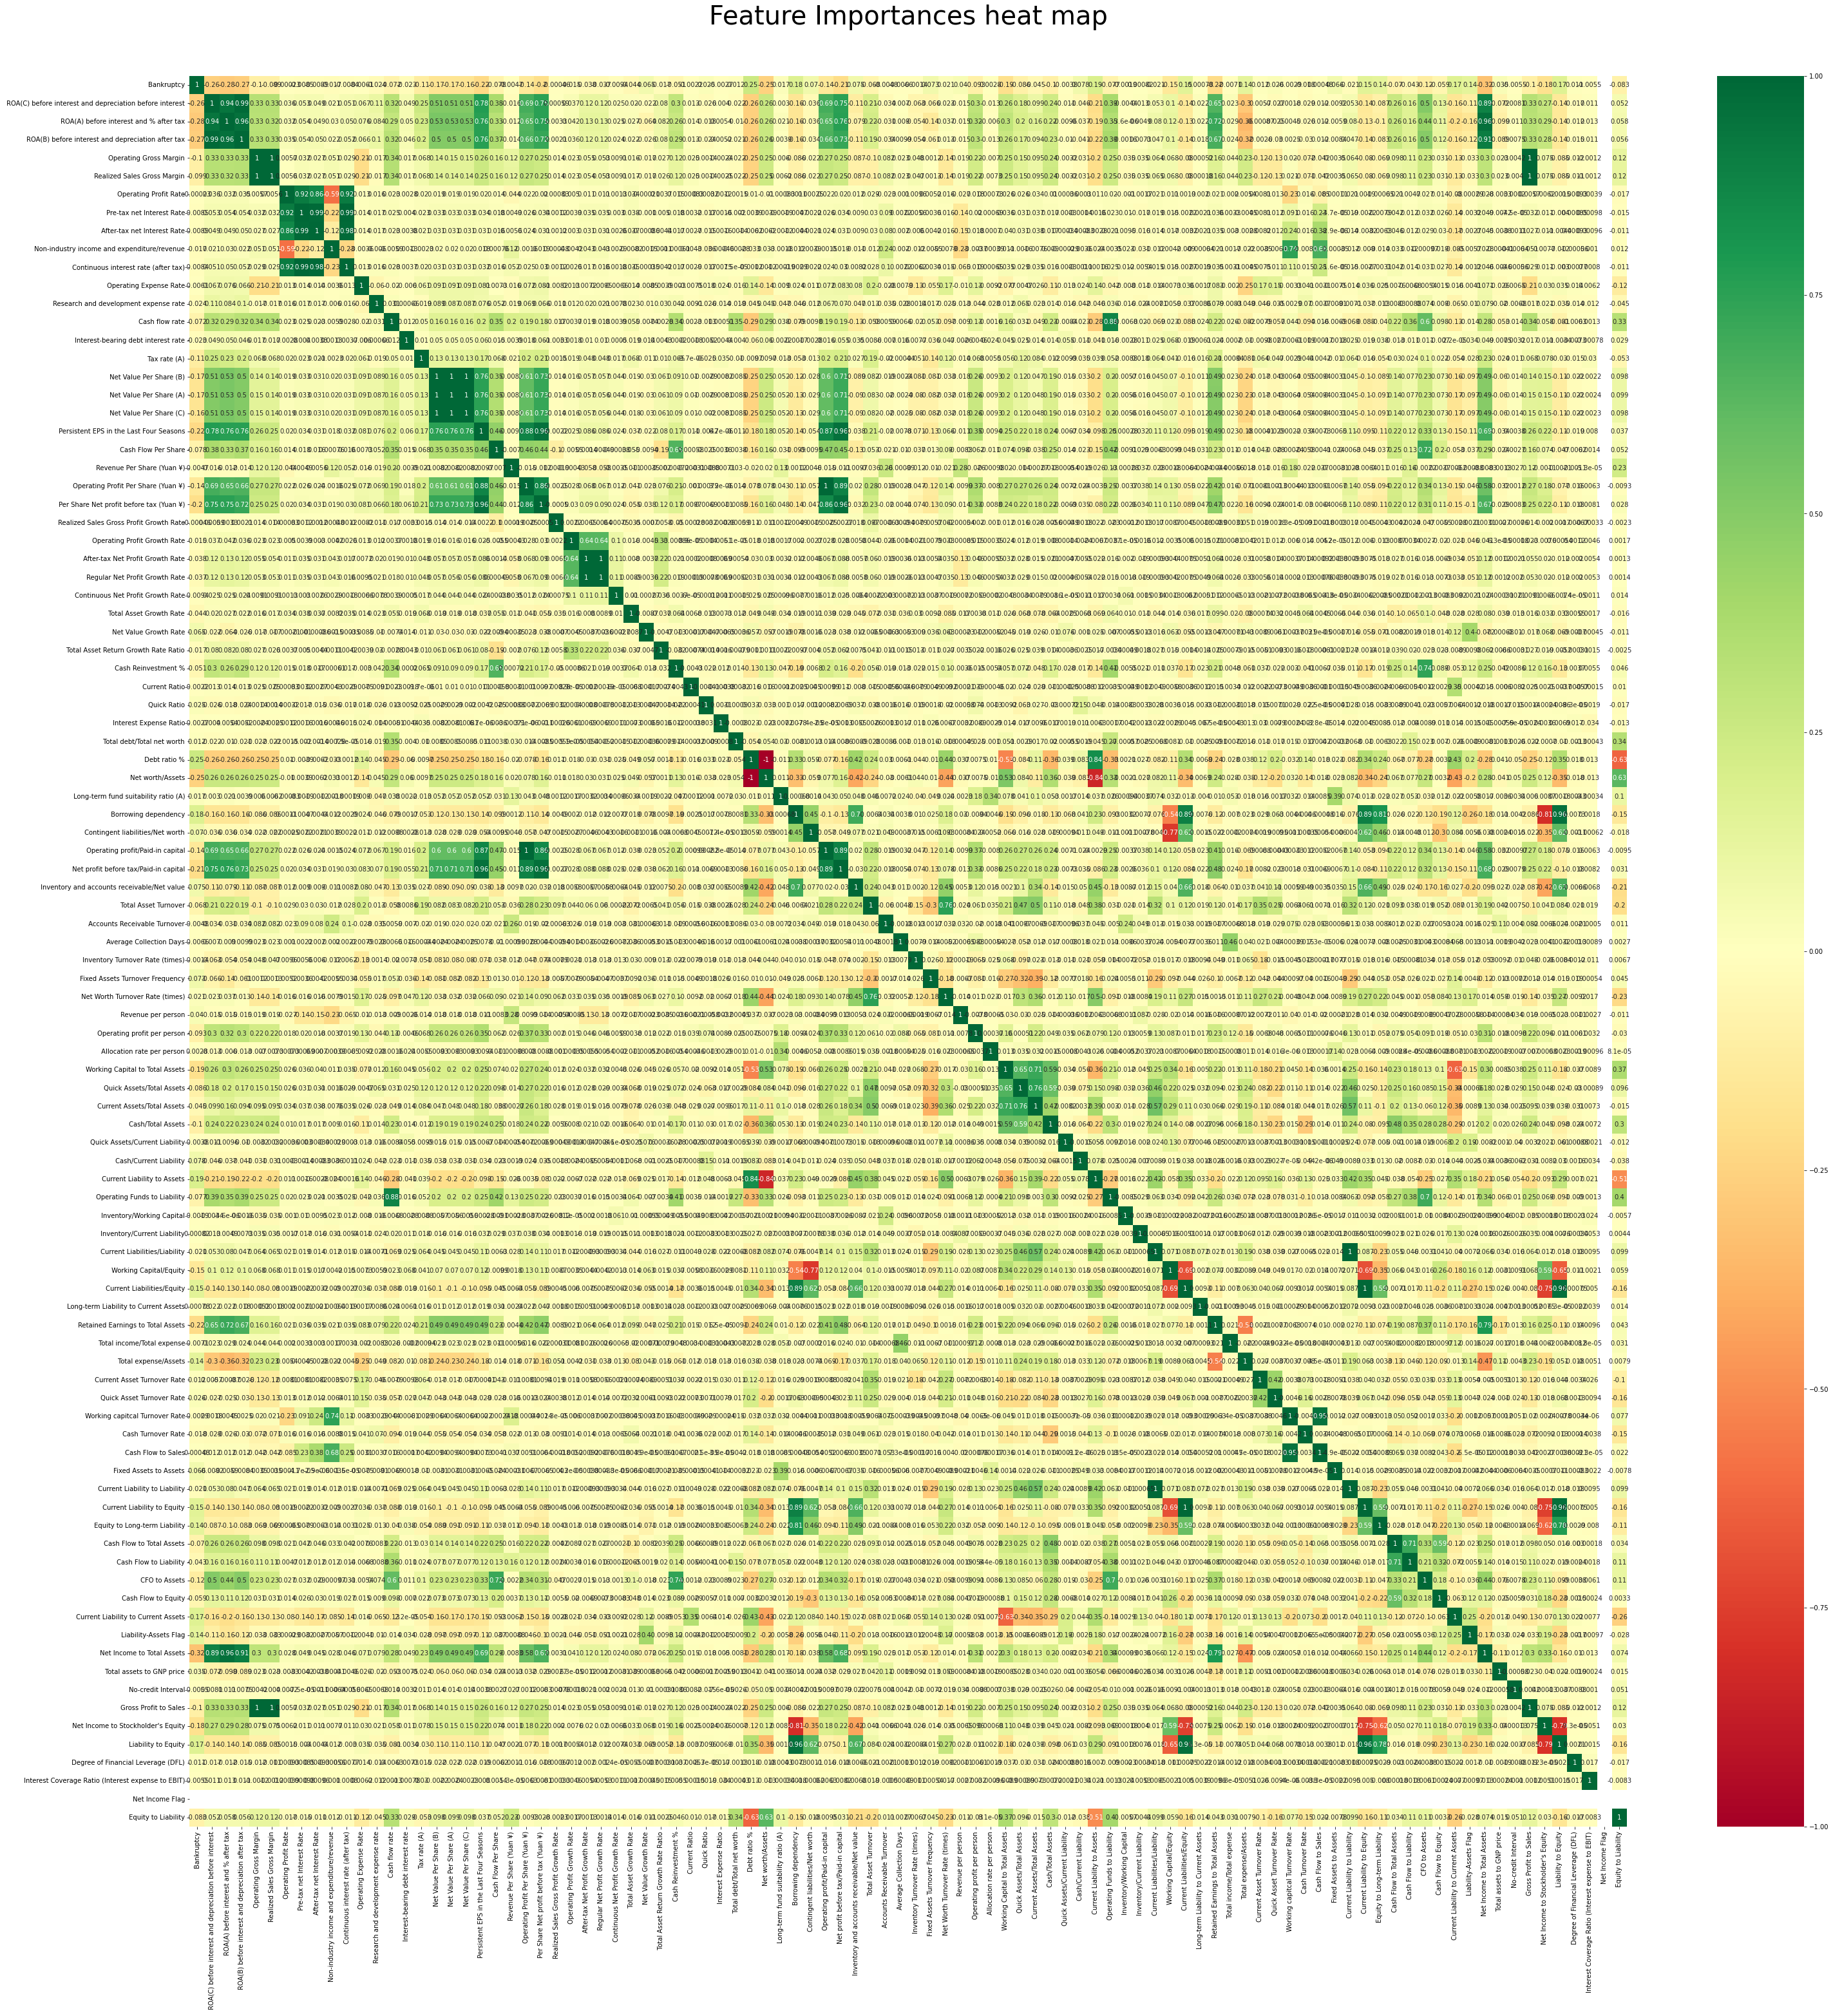

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns

X = df_out.drop('Bankruptcy',1)
y = df_out.loc[:, 'Bankruptcy']

corrmat = df_out.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(50,50))
plt.title('Feature Importances heat map', size= 40, pad= 80)

g=sns.heatmap(df_out[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Feature Extraction

1. LDA

Membuat model LDA, karena kelas dari dataset hanya berjumlah dua, maka n_columns berjumlah 1 (2-1)

In [18]:
from sklearn import manifold, datasets, decomposition, discriminant_analysis

X = df_out.drop('Bankruptcy',1)
y = df_out.loc[:, 'Bankruptcy']

lda = discriminant_analysis.LinearDiscriminantAnalysis().fit_transform(X, y)

lda_df = pd.DataFrame(data = lda, columns = ['new_var1'])
finalDf = pd.concat([lda_df, (y.reset_index().drop('index', 1))], axis = 1)
finalDf.head()

c:\users\lenovo\pycharmprojects\data science\venv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\lenovo\pycharmprojects\data science\venv\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':


new_var1  Bankruptcy
0  3.925417         1.0
1  0.940875         1.0
2  4.981752         1.0
3  1.697771         1.0
4  0.173164         1.0

Visualisasi dengan scatter plot

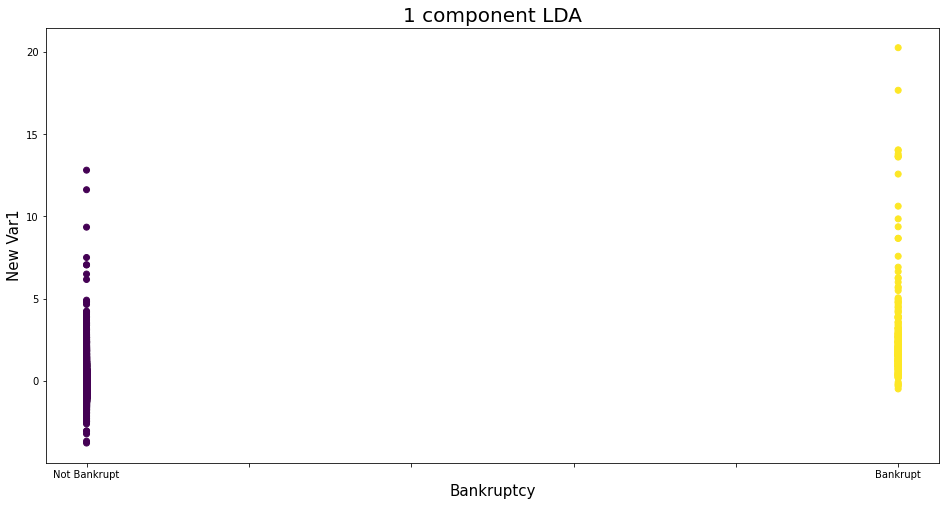

In [19]:
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,1,1) 

ax.scatter(finalDf['Bankruptcy'], finalDf['new_var1'], c=finalDf['Bankruptcy'])

ax.set_xlabel('Bankruptcy', fontsize = 15)
ax.set_ylabel('New Var1', fontsize = 15)
ax.set_title('1 component LDA', fontsize = 20)

plt.setp(ax, xticks= np.linspace(0,1,6), xticklabels= ['Not Bankrupt', '', '', '', '', 'Bankrupt'])

ax.grid(False)

2. PCA

Membuat model, lalu menunjukkan hasil fitur ekstraksi beserta kelas dataset, berbeda dengan LDA, kita bisa mengatur n_columns dari PCA

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf2 = pd.concat([principalDf, (y.reset_index().drop('index', 1))], axis = 1)
finalDf2.head()

c:\users\lenovo\pycharmprojects\data science\venv\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


principal component 1  principal component 2  Bankruptcy
0           2.165330e+09          -3.814949e+07         1.0
1           4.902366e+08           8.463795e+09         1.0
2          -2.620138e+09          -2.169966e+09         1.0
3           3.249284e+09           5.987899e+09         1.0
4           7.604602e+09          -2.951427e+09         1.0

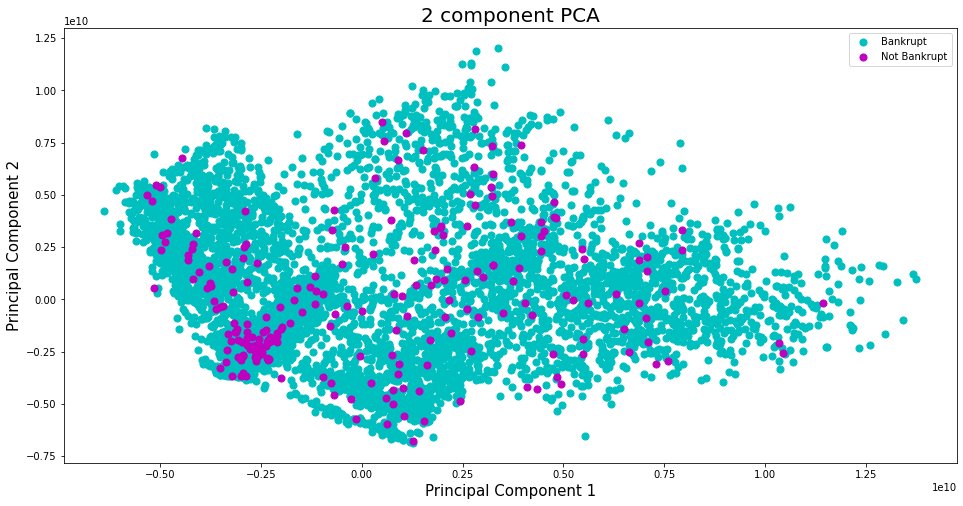

In [21]:
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0.0,1.0]
colors = ['c', 'm']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Bankruptcy'] == target
    ax.scatter(finalDf2.loc[indicesToKeep, 'principal component 1']
               , finalDf2.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
    
ax.legend(["Bankrupt", "Not Bankrupt"])
ax.grid(False)

3. t-SNE

Membuat model t-SNE

In [22]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X)

print(X_2d)

[[ 69.944084 -11.323719]
 [ 67.33494   14.527354]
 [-39.94151  -18.548346]
 ...
 [-30.415646 -22.336105]
 [-27.40955   57.4331  ]
 [-64.30166  -48.985683]]


Menggabungkan 2 fitur hasil ekstraksi dengan kelas, lalu menunjukkannya dalam bentuk dataframe

In [23]:
new_df = pd.DataFrame(data = X_2d
             , columns = ['feature 1', 'feature 2'])
tsne_df = pd.concat([new_df, (y.reset_index().drop('index', 1))], axis = 1)
tsne_df.head()

c:\users\lenovo\pycharmprojects\data science\venv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


feature 1  feature 2  Bankruptcy
0  69.944084 -11.323719         1.0
1  67.334938  14.527354         1.0
2 -39.941509 -18.548346         1.0
3  33.163345  18.294554         1.0
4   6.035753 -26.682055         1.0

Visualisasi hasil fitur ekstraksi t-SNE dengan scatter plot

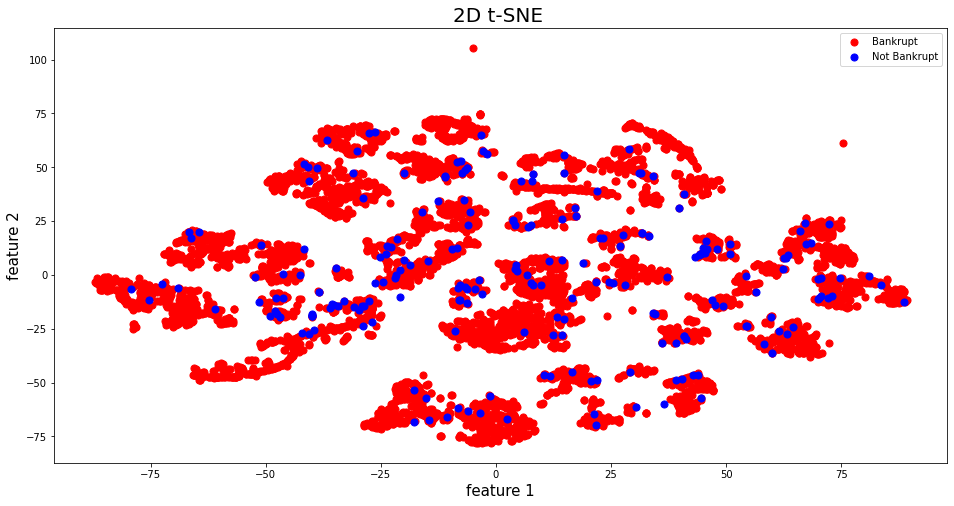

In [24]:
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('feature 1', fontsize = 15)
ax.set_ylabel('feature 2', fontsize = 15)
ax.set_title('2D t-SNE ', fontsize = 20)

targets = [0.0,1.0]
colors = ['r', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = tsne_df['Bankruptcy'] == target
    ax.scatter(tsne_df.loc[indicesToKeep, 'feature 1']
               , tsne_df.loc[indicesToKeep, 'feature 2']
               , c = color
               , s = 50)
    
ax.legend(["Bankrupt", "Not Bankrupt"])
ax.grid(False)